<a href="https://colab.research.google.com/github/AhmadAlsebai/Patient-s-Condition-NLP-Project-Tutorial/blob/main/patient_condition_nlp_project_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP Project Tutorial

To analyze patient reviews on drugs and use Natural Language Processing (NLP) techniques to classify their medical condition. This classification will help in recommending suitable drugs based on their experiences and reported symptoms, ultimately improving personalized medication suggestions.

## Importing Library

In [3]:
import pandas as pd  # Importing pandas for data manipulation and analysis
import itertools  # Importing itertools for working with iterators efficiently
import string  # Importing string module for string operations
import numpy as np  # Importing numpy for numerical computing
import seaborn as sns  # Importing seaborn for data visualization

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Importing text vectorization tools from sklearn
from sklearn.model_selection import train_test_split  # Importing function to split data into training and testing sets
from sklearn.linear_model import PassiveAggressiveClassifier  # Importing PassiveAggressiveClassifier for text classification
from sklearn.naive_bayes import MultinomialNB  # Importing Naive Bayes classifier for text classification
from sklearn import metrics  # Importing metrics module for evaluating model performance
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization

# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)  # Setting pandas option to display all rows of a DataFrame


Read the Data

In [28]:
data_frame = pd.read_csv('drugsComTrain.tsv', sep='\t', quoting=csv.QUOTE_NONE, encoding='utf-8', on_bad_lines='skip')

In [29]:
data_frame.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""""""It has no side effect, I take it in combina...",9.0,"May 20, 2012",27.0
1,95260,Guanfacine,ADHD,"""""""My son is halfway through his fourth week o...",NaN,NaN,NaN
2,We have tried many different medications and s...,8.0,"April 27, 2010",192,NaN,NaN,NaN
3,92703,Lybrel,Birth Control,"""""""I used to take another oral contraceptive, ...",NaN,NaN,NaN
4,The positive side is that I didn&#039;t have a...,5.0,"December 14, 2009",17,NaN,NaN,NaN


In [51]:
data_frame.condition.value_counts().head(10)  # Counts and displays the number of occurrences of each unique condition in the dataset

,count
condition,
Birth Control,24698
Depression,7824
Pain,5290
Anxiety,5062
Acne,4823
Bipolar Disorde,3586
Insomnia,3145
Weight Loss,3097
Obesity,3087


In [42]:
data_frame_train = data_frame[(data_frame['condition'] == 'Birth Control') |  (data_frame['condition'] == 'Depression') |  (data_frame['condition'] == 'High Blood Pressure')
|  (data_frame['condition'] == 'Diabetes, Type 2')  ]  # Filtering the dataset to include only specific conditions

In [43]:
data_frame_train.shape

(36742, 7)

In [45]:
X = data_frame_train.drop(['Unnamed: 0', 'drugName', 'rating', 'date', 'usefulCount'], axis=1)

Goal: To remove unnecessary columns that are not needed for the analysis.
**.drop([...], axis=1) **→ Removes specified columns.

**'Unnamed: 0' **→ Likely an index column from CSV.

**'drugName' **→ The drug name, which might not be useful for text analysis.

**'rating' **→ A numerical score, not needed if focusing on text.

**'date'** → The date of the review, not required.

**'usefulCount'** → Number of upvotes on a review, may not be useful for classification.

In [52]:
X.condition.value_counts()

,count
condition,
Birth Control,24698
Depression,7824
"Diabetes, Type 2",2214
High Blood Pressure,2006


In [53]:
# Segregating dataframe for analyzing individual conditions

X_birth = X[X['condition'] == 'Birth Control']  # Filtering records where condition is 'Birth Control'
X_dep = X[X['condition'] == 'Depression']  # Filtering records where condition is 'Depression'
X_bp = X[X['condition'] == 'High Blood Pressure']  # Filtering records where condition is 'High Blood Pressure'
X_diab = X[X['condition'] == 'Diabetes, Type 2']  # Filtering records where condition is 'Diabetes, Type 2'


Text(0.5, 1.0, 'Word cloud for Diabetes')

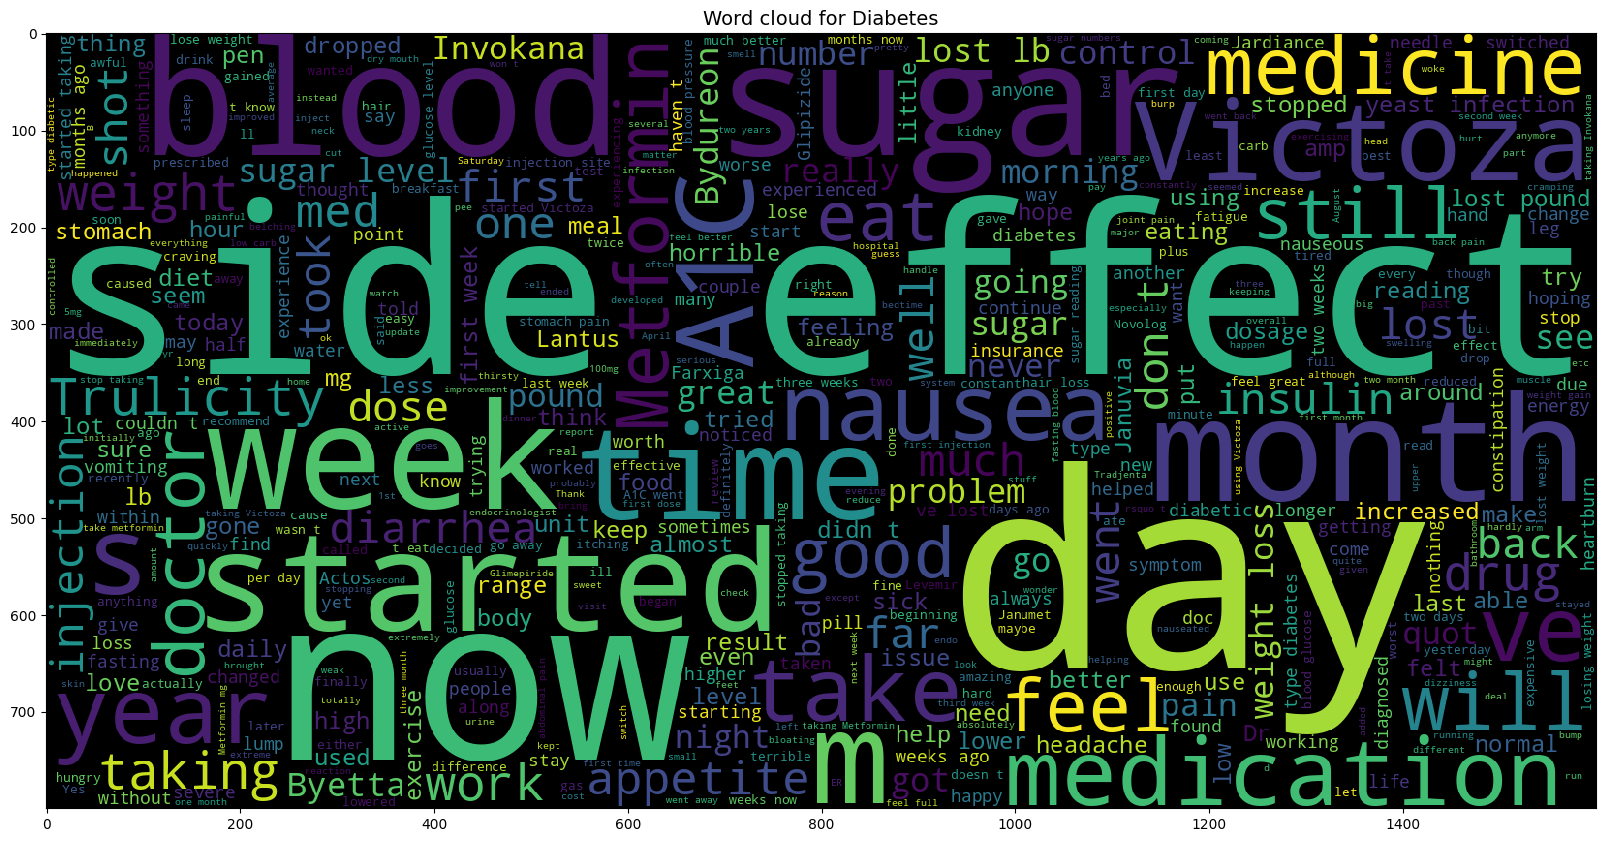

In [58]:
from wordcloud import WordCloud  # Importing WordCloud for generating word cloud visualizations

#plt.figure(figsize=(20,20))  # Setting figure size for better visualization
#wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_birth.review))  # Creating a word cloud from the 'review' column of the 'X_birth' dataset (Birth Control reviews)
#plt.imshow(wc, interpolation='bilinear')  # Displaying the word cloud
#plt.title('Word cloud for Birth Control', fontsize=14)  # Setting the title for the plot

plt.figure(figsize=(20,20))  # Setting figure size for the next word cloud
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_diab.review))
# Creating a word cloud from the 'review' column of the 'X_diab' dataset (Diabetes reviews)
plt.imshow(wc, interpolation='nearest')  # Displaying the word cloud
plt.title('Word cloud for Diabetes', fontsize=14)  # Setting the title for the plot
